**START OF SPRINT 1**

In [ ]:
!pip install cellxgene_census
!pip install scanpy
!pip install mygene
!pip install pandas openpyxl
import cellxgene_census as cellxgene
import urllib
import scanpy as sc
import numpy as np
import pandas as pd

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 7.9 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256

**Step 1: Loading and Preparing the Datasets**

*   Code to Load Each Dataset

In [ ]:
import scanpy as sc
import urllib.request

# Load each dataset from the URLs provided
urls = [
    'https://datasets.cellxgene.cziscience.com/6ea7ef32-8a23-40d2-8870-811df2fb2d53.h5ad',
]

# Names of the loaded datasets for reference
dataset_names = [
   'adata_micro'
]

# Loading datasets
datasets = {}
for url, name in zip(urls, dataset_names):
    urllib.request.urlretrieve(url, f"{name}.h5ad")
    datasets[name] = sc.read_h5ad(f"{name}.h5ad")

In [ ]:
# Display the available columns in `.obs` for each dataset
for name, adata in datasets.items():
    print(f"Columns in {name}.obs:")
    print(adata.obs.columns)
    print(adata.obs.dtypes)
    print(adata.obs.shape)
    print("\n")

# Display the available columns in `.var` for each dataset
# for name, adata in datasets.items():
#     print(f"Columns in {name}.var:")
#     print(adata.var.columns)
#     print("\n")

Columns in adata_micro.obs:
Index(['assay_ontology_term_id', 'suspension_type',
       'cell_type_ontology_term_id', 'development_stage_ontology_term_id',
       'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id',
       'organism_ontology_term_id', 'sex_ontology_term_id',
       'tissue_ontology_term_id', 'is_primary_data', 'donor_id',
       'Neurotypical reference', 'Class', 'Subclass', 'Supertype',
       'Age at death', 'Years of education', 'Cognitive status', 'ADNC',
       'Braak stage', 'Thal phase', 'CERAD score', 'APOE4 status',
       'Lewy body disease pathology', 'LATE-NC stage',
       'Microinfarct pathology', 'Specimen ID', 'PMI', 'Number of UMIs',
       'Genes detected', 'Fraction mitochrondrial UMIs', 'tissue_type',
       'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue',
       'self_reported_ethnicity', 'development_stage', 'observation_joinid'],
      dtype='object')
assay_ontology_term_id                      category
suspension_t

In [ ]:
adata_micro = datasets['adata_micro']
filtered_adata_micro = adata_micro[adata_micro.obs['Braak stage'].isin(['Braak 0', 'Braak II', 'Braak III', 'Braak IV'])]
print(filtered_adata_micro)
filtered_adata_micro.obs.head()
print(filtered_adata_micro.obs.columns.tolist())

View of AnnData object with n_obs × n_vars = 16372 × 36412
    obs: 'assay_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'donor_id', 'Neurotypical reference', 'Class', 'Subclass', 'Supertype', 'Age at death', 'Years of education', 'Cognitive status', 'ADNC', 'Braak stage', 'Thal phase', 'CERAD score', 'APOE4 status', 'Lewy body disease pathology', 'LATE-NC stage', 'Microinfarct pathology', 'Specimen ID', 'PMI', 'Number of UMIs', 'Genes detected', 'Fraction mitochrondrial UMIs', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'ADNC_colo

In [ ]:
# Select relevant features for Lasso regression, handling categorical columns
X = filtered_adata_micro.obs[['Age at death', 'APOE4 status', 'Fraction mitochrondrial UMIs', 'Braak stage']]

# Separate categorical and numerical columns
categorical_columns = X.select_dtypes(['category', 'object']).columns
numerical_columns = X.select_dtypes(exclude=['category', 'object']).columns

# Fill missing values for numerical columns with 0
X[numerical_columns] = X[numerical_columns].fillna(0)

# Process categorical columns by adding 'missing' category and encoding
for col in categorical_columns:
    X[col] = X[col].astype('category')
    X[col] = X[col].cat.add_categories('missing').fillna('missing')
    X[col] = X[col].cat.codes  # Convert categories to integer codes

# Confirm that X is now fully numerical and can be used in Lasso regression
print(X.head())

                                                Age at death  APOE4 status  \
exp_component_name                                                           
GTCTGTCTCTCAGGCG-L8TX_210617_01_B12-1113634357             1             0   
TTCATGTGTCACCGAC-L8TX_210812_01_A11-1124416554             2             0   
TTCTGTAAGAGTGTGC-L8TX_210603_01_D10-1108850820             2             0   
GTACAGTGTCGGATTT-L8TX_210521_01_A05-1108004448             2             0   
CCAATTTGTGTATCCA-L8TX_210902_01_A09-1129993890             1             1   

                                                Fraction mitochrondrial UMIs  \
exp_component_name                                                             
GTCTGTCTCTCAGGCG-L8TX_210617_01_B12-1113634357                      0.006122   
TTCATGTGTCACCGAC-L8TX_210812_01_A11-1124416554                      0.001576   
TTCTGTAAGAGTGTGC-L8TX_210603_01_D10-1108850820                      0.001328   
GTACAGTGTCGGATTT-L8TX_210521_01_A05-1108004448       

<ipython-input-5-619452ff0f2b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_columns] = X[numerical_columns].fillna(0)
<ipython-input-5-619452ff0f2b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')
<ipython-input-5-619452ff0f2b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


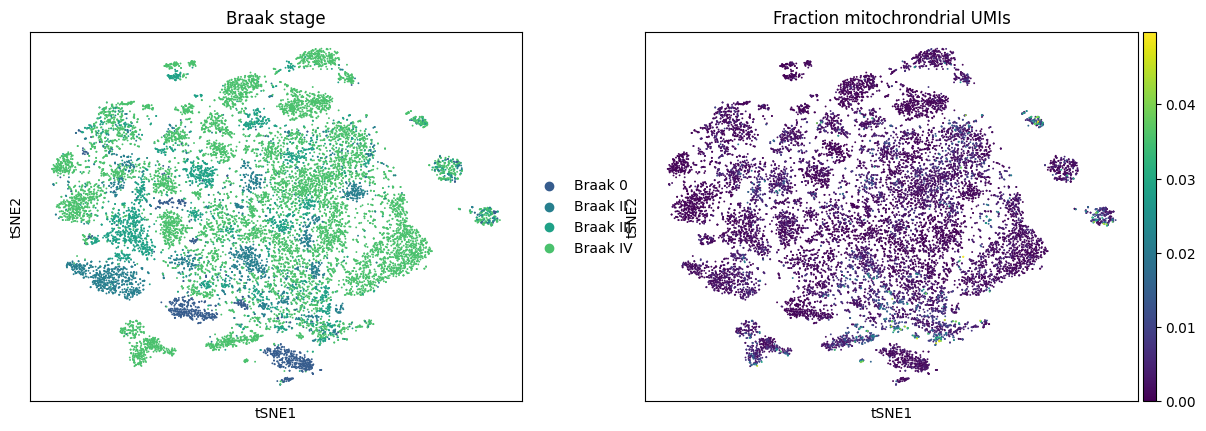

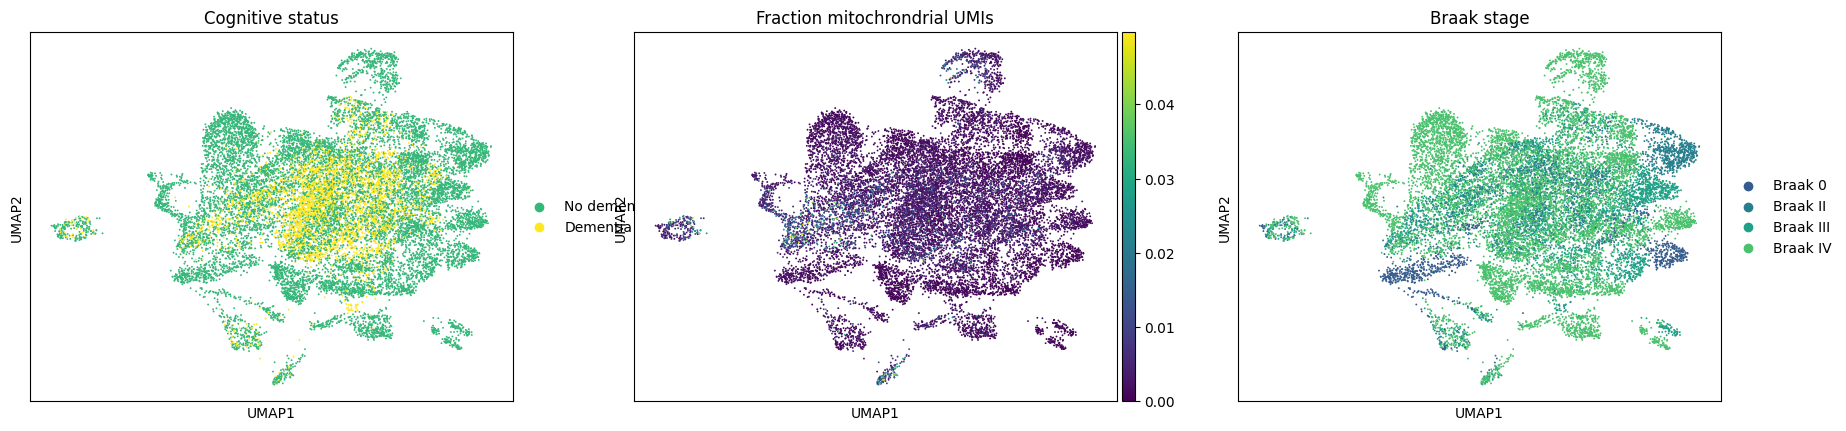

In [ ]:
# Perform PCA on the dataset first
sc.tl.pca(filtered_adata_micro, n_comps=30)

# Now run t-SNE using the PCA-reduced representation
sc.tl.tsne(filtered_adata_micro, use_rep='X_pca', n_pcs=30)
sc.pl.tsne(filtered_adata_micro, color=['Braak stage', 'Fraction mitochrondrial UMIs'])

# UMAP visualization
sc.pp.neighbors(filtered_adata_micro, n_neighbors=15, use_rep='X_pca')
sc.tl.umap(filtered_adata_micro)
sc.pl.umap(filtered_adata_micro, color=['Cognitive status', 'Fraction mitochrondrial UMIs', 'Braak stage'])

**Step 3: Dimensionality Reduction for Visualization (t-SNE and UMAP)**


Objective: Apply t-SNE and UMAP for clustering based on ROS levels, tau pathology, and cognitive status.

In [ ]:
from sklearn.linear_model import LassoCV
import pandas as pd

# Select relevant features for Lasso regression, handling categorical columns
X = filtered_adata_micro.obs[['Age at death', 'APOE4 status', 'Fraction mitochrondrial UMIs', 'Braak stage', 'disease']]

# Handle categorical and numerical columns
categorical_columns = X.select_dtypes(['category', 'object']).columns
numerical_columns = X.select_dtypes(exclude=['category', 'object']).columns

# Fill missing values and encode categories
X[numerical_columns] = X[numerical_columns].fillna(0)
for col in categorical_columns:
    X[col] = X[col].astype('category').cat.add_categories('missing').fillna('missing')
    X[col] = X[col].cat.codes

# Confirm that X is now numerical
print(X.head())

                                                Age at death  APOE4 status  \
exp_component_name                                                           
GTCTGTCTCTCAGGCG-L8TX_210617_01_B12-1113634357             1             0   
TTCATGTGTCACCGAC-L8TX_210812_01_A11-1124416554             2             0   
TTCTGTAAGAGTGTGC-L8TX_210603_01_D10-1108850820             2             0   
GTACAGTGTCGGATTT-L8TX_210521_01_A05-1108004448             2             0   
CCAATTTGTGTATCCA-L8TX_210902_01_A09-1129993890             1             1   

                                                Fraction mitochrondrial UMIs  \
exp_component_name                                                             
GTCTGTCTCTCAGGCG-L8TX_210617_01_B12-1113634357                      0.006122   
TTCATGTGTCACCGAC-L8TX_210812_01_A11-1124416554                      0.001576   
TTCTGTAAGAGTGTGC-L8TX_210603_01_D10-1108850820                      0.001328   
GTACAGTGTCGGATTT-L8TX_210521_01_A05-1108004448       

<ipython-input-7-fedeb540cc38>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_columns] = X[numerical_columns].fillna(0)
<ipython-input-7-fedeb540cc38>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category').cat.add_categories('missing').fillna('missing')
<ipython-input-7-fedeb540cc38>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [ ]:
from sklearn.linear_model import LassoCV
import pandas as pd

# Select relevant features for Lasso regression, handling categorical columns
X = filtered_adata_micro.obs[['Age at death', 'APOE4 status', 'Fraction mitochrondrial UMIs', 'Braak stage', 'disease']]

# Handle categorical and numerical columns
categorical_columns = X.select_dtypes(['category', 'object']).columns
numerical_columns = X.select_dtypes(exclude=['category', 'object']).columns

# Fill missing values and encode categories
X[numerical_columns] = X[numerical_columns].fillna(0)
for col in categorical_columns:
    X[col] = X[col].astype('category').cat.add_categories('missing').fillna('missing')
    X[col] = X[col].cat.codes

# Confirm that X is now numerical
print(X.head())

                                                Age at death  APOE4 status  \
exp_component_name                                                           
GTCTGTCTCTCAGGCG-L8TX_210617_01_B12-1113634357             1             0   
TTCATGTGTCACCGAC-L8TX_210812_01_A11-1124416554             2             0   
TTCTGTAAGAGTGTGC-L8TX_210603_01_D10-1108850820             2             0   
GTACAGTGTCGGATTT-L8TX_210521_01_A05-1108004448             2             0   
CCAATTTGTGTATCCA-L8TX_210902_01_A09-1129993890             1             1   

                                                Fraction mitochrondrial UMIs  \
exp_component_name                                                             
GTCTGTCTCTCAGGCG-L8TX_210617_01_B12-1113634357                      0.006122   
TTCATGTGTCACCGAC-L8TX_210812_01_A11-1124416554                      0.001576   
TTCTGTAAGAGTGTGC-L8TX_210603_01_D10-1108850820                      0.001328   
GTACAGTGTCGGATTT-L8TX_210521_01_A05-1108004448       

<ipython-input-8-fedeb540cc38>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_columns] = X[numerical_columns].fillna(0)
<ipython-input-8-fedeb540cc38>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category').cat.add_categories('missing').fillna('missing')
<ipython-input-8-fedeb540cc38>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

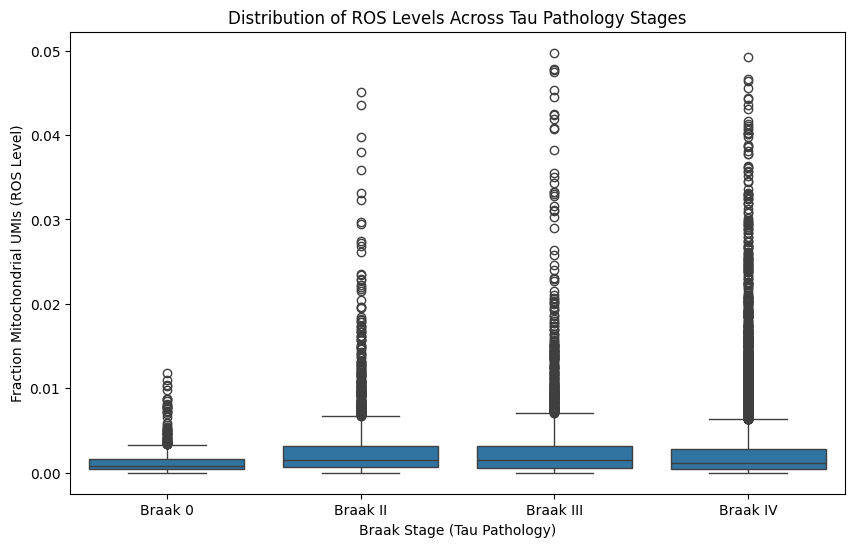

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of ROS levels across AD stages
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_adata_micro.obs['Braak stage'], y=filtered_adata_micro.obs['Fraction mitochrondrial UMIs'])
plt.xlabel("Braak Stage (Tau Pathology)")
plt.ylabel("Fraction Mitochondrial UMIs (ROS Level)")
plt.title("Distribution of ROS Levels Across Tau Pathology Stages")
plt.show()

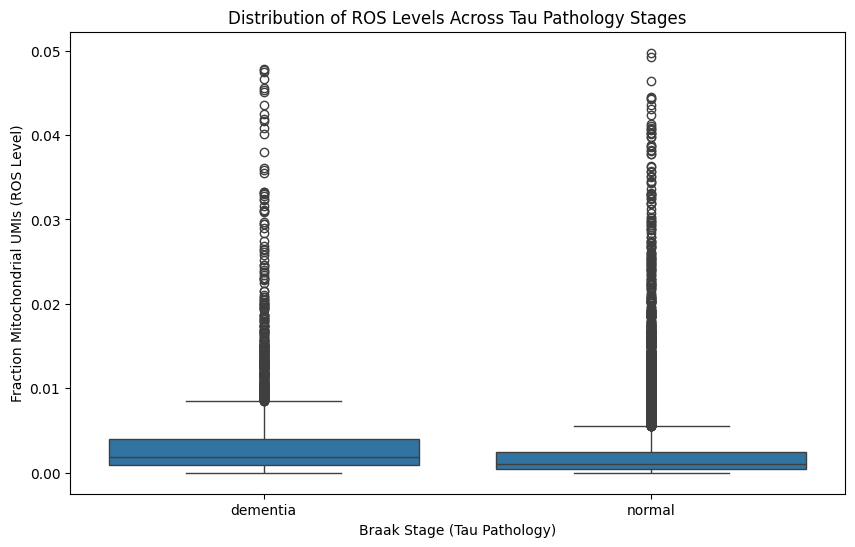

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of ROS levels across AD stages
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_adata_micro.obs['disease'], y=filtered_adata_micro.obs['Fraction mitochrondrial UMIs'])
plt.xlabel("Braak Stage (Tau Pathology)")
plt.ylabel("Fraction Mitochondrial UMIs (ROS Level)")
plt.title("Distribution of ROS Levels Across Tau Pathology Stages")
plt.show()

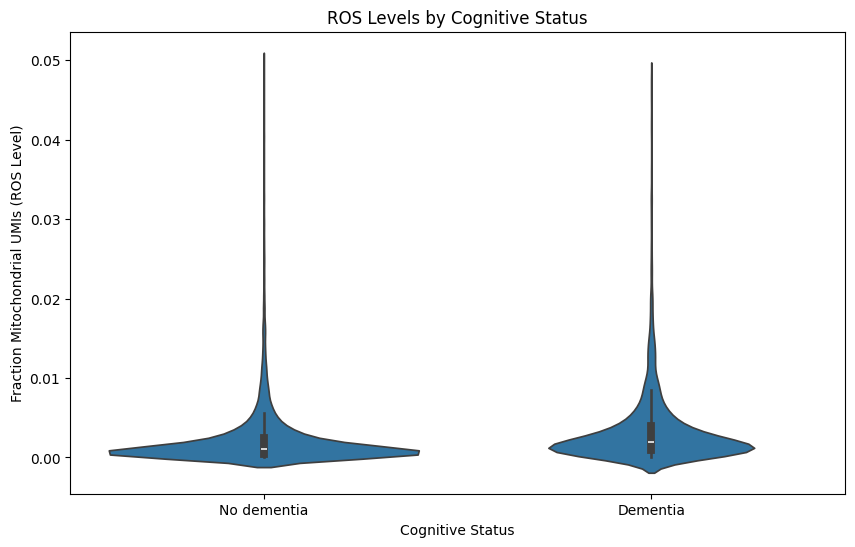

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=filtered_adata_micro.obs['Cognitive status'], y=filtered_adata_micro.obs['Fraction mitochrondrial UMIs'])
plt.xlabel("Cognitive Status")
plt.ylabel("Fraction Mitochondrial UMIs (ROS Level)")
plt.title("ROS Levels by Cognitive Status")
plt.show()

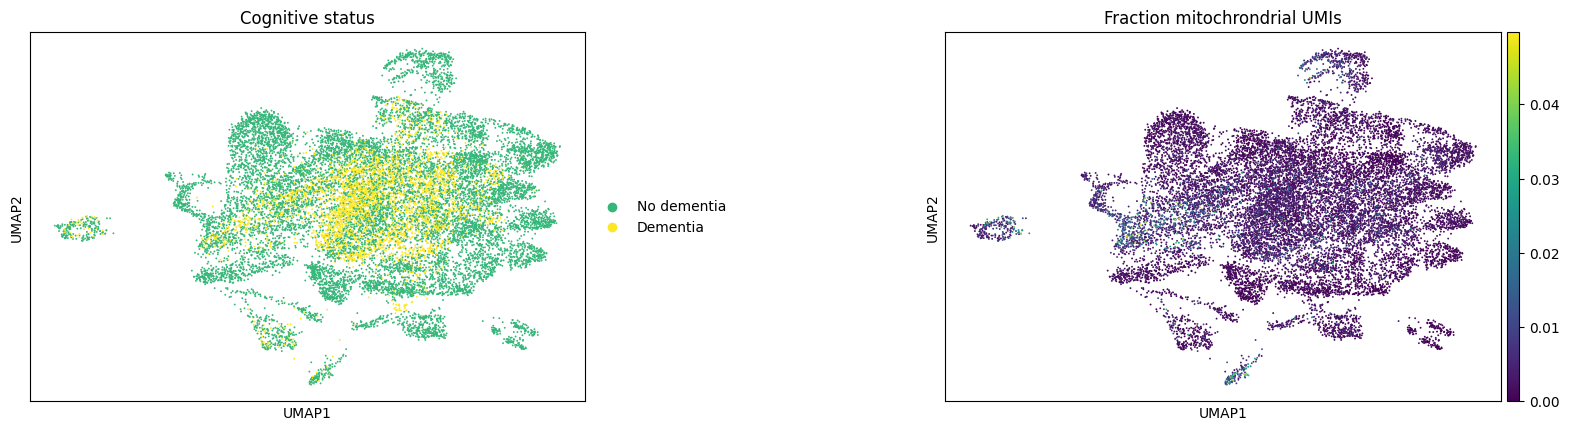

In [ ]:
# UMAP visualization by Cognitive status and ROS levels
sc.pl.umap(filtered_adata_micro, color=['Cognitive status', 'Fraction mitochrondrial UMIs'], wspace=0.5)

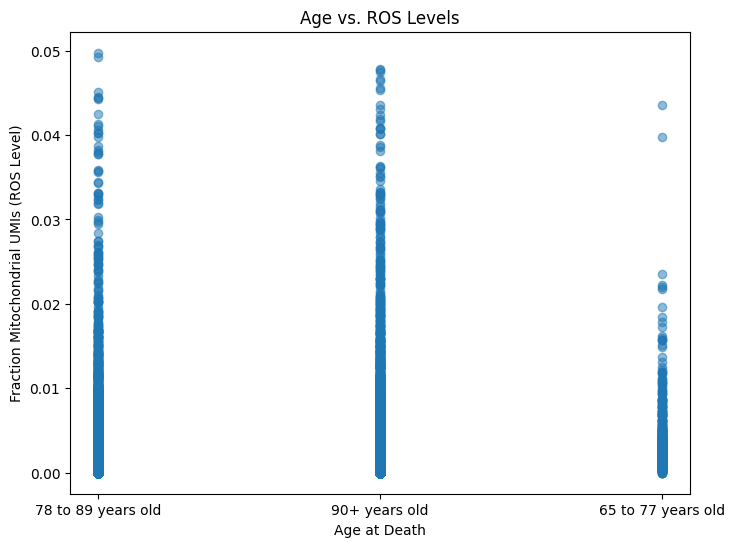

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(filtered_adata_micro.obs['Age at death'], filtered_adata_micro.obs['Fraction mitochrondrial UMIs'], alpha=0.5)
plt.xlabel("Age at Death")
plt.ylabel("Fraction Mitochondrial UMIs (ROS Level)")
plt.title("Age vs. ROS Levels")
plt.show()

['78 to 89 years old', '90+ years old', '65 to 77 years old']
Categories (3, object): ['65 to 77 years old', '78 to 89 years old', '90+ years old']
['N', 'Y']
Categories (2, object): ['N', 'Y']
[0.00612245 0.00157622 0.00132829 ... 0.00208976 0.00039098 0.00361087]
['Braak IV', 'Braak III', 'Braak 0', 'Braak II']
Categories (4, object): ['Braak 0', 'Braak II', 'Braak III', 'Braak IV']


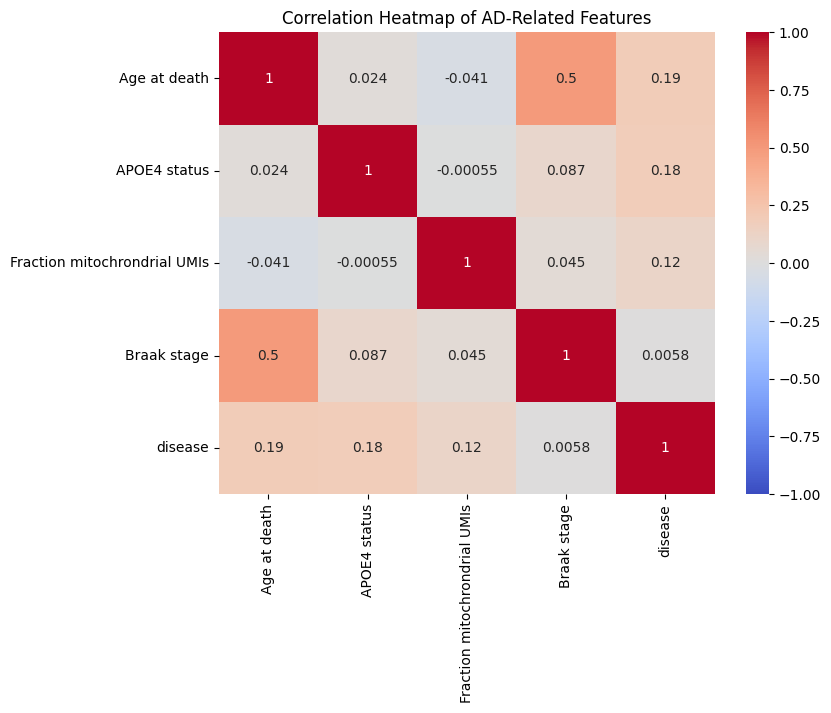

In [ ]:
print(filtered_adata_micro.obs['Age at death'].unique())
print(filtered_adata_micro.obs['APOE4 status'].unique())
print(filtered_adata_micro.obs['Fraction mitochrondrial UMIs'].unique())
print(filtered_adata_micro.obs['Braak stage'].unique())

# Copy the relevant columns
correlation_data = filtered_adata_micro.obs[['Age at death', 'APOE4 status', 'Fraction mitochrondrial UMIs', 'Braak stage', 'disease']].copy()

# Define mapping dictionaries
braak_mapping = {
    'Braak 0': 0,
    'Braak I': 1,
    'Braak II': 2,
    'Braak III': 3,
    'Braak IV': 4,
    'Braak V': 5,
    'Braak VI': 6
}

age_mapping = {
    '65 to 77 years old': 71,
    '78 to 89 years old': 83.5,
    '90+ years old': 95
}

umi_mapping = {
    'N': 0,
    'Y': 1
}

disease_mapping = {
    'normal': 0,
    'dementia': 1
}


# Apply mappings
correlation_data['Braak stage'] = correlation_data['Braak stage'].map(braak_mapping)
correlation_data['Age at death'] = correlation_data['Age at death'].map(age_mapping)
correlation_data['APOE4 status'] = correlation_data['APOE4 status'].map(umi_mapping)
correlation_data['disease'] = correlation_data['disease'].map(disease_mapping)

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of AD-Related Features")
plt.show()

**Conclusions from the visualizations**

The visualizations collectively provide strong evidence supporting the hypothesis that mitochondrial ROS is intricately linked with tau pathology progression and cognitive decline in Alzheimer's disease (AD). Each visualization sheds light on different aspects of this relationship, highlighting the potential of mitochondrial-targeted antioxidant treatments to mitigate AD pathology by reducing oxidative stress.

The UMAP visualizations, which map cognitive status and mitochondrial ROS levels across cellular landscapes, illustrate a notable correlation between elevated ROS levels and regions associated with cognitive impairment. In the left panel, "Cognitive Status," we observe clusters of dementia and non-dementia cases without clear segregation. However, the overlay of ROS levels in the right panel reveals regions where ROS concentration is markedly higher. These areas of high ROS density often coincide with the distribution of dementia cases, suggesting that oxidative stress may play a role in cognitive dysfunction.

Further insights are provided by the tSNE plot of Braak stages, a staging system for tau pathology severity in AD. Here, the spatial separation of Braak stages indicates progressive tau pathology that correlates with mitochondrial ROS levels. Specifically, the visualization reveals that higher Braak stages (indicating advanced tau aggregation) are spatially distinct, suggesting an association between tau pathology progression and mitochondrial dysfunction. Given that ROS levels are known to accelerate tau aggregation, this spatial relationship reinforces the hypothesis that oxidative stress drives pathological tau accumulation.

The box plot analysis of ROS levels across Braak stages presents a compelling trend: as tau pathology progresses from Braak 0 (minimal tau) to Braak IV (advanced tau), ROS levels not only increase but also show greater variability. This pattern implies that oxidative stress is not merely a byproduct of cellular aging but may actively contribute to the pathological progression of tau in AD. The broad range of ROS levels in later stages suggests that some cells may be more vulnerable to mitochondrial dysfunction, which could lead to variability in disease severity and progression across individuals.

The violin plot comparing ROS levels between cognitive states (dementia vs. no dementia) provides further evidence of the link between oxidative stress and cognitive decline. It demonstrates a significant shift in ROS distribution, with individuals suffering from dementia exhibiting notably higher ROS densities. This trend underscores the hypothesis that mitochondrial dysfunction and oxidative stress are more pronounced in AD, contributing directly to cognitive decline. Such findings support the idea that targeted interventions to reduce ROS might alleviate cognitive symptoms in AD by restoring mitochondrial function and reducing tau pathology.

Finally, the scatter plot of ROS levels across age groups suggests that ROS accumulation is age-dependent, with older individuals generally exhibiting higher ROS levels. This age-related increase in oxidative stress aligns with the known risk factor of aging in AD and implies that mitochondrial dysfunction and oxidative stress may worsen over time, exacerbating AD pathology in elderly populations. This observation highlights the urgency of early intervention, as delaying or reducing ROS accumulation in mitochondrial pathways could potentially slow disease progression.

In summary, these findings collectively support the hypothesis that targeting mitochondrial ROS could play a therapeutic role in reducing tau oligomer formation and alleviating oxidative stress, ultimately slowing cognitive decline in AD. The data suggest that mitochondrial-targeted antioxidant treatments could suppress tau accumulation by improving mitochondrial function and reducing cellular vulnerability to oxidative stress, offering a promising strategy for AD intervention.

**Step 4: Feature Selection Using Lasso Regression**

Objective: Identify important features related to tau oligomer levels and ROS using Lasso regression, focusing on specific fields across adata.obs and adata.var

In [ ]:
from sklearn.linear_model import LassoCV
import pandas as pd

# Select relevant features for Lasso regression, handling categorical columns
X = filtered_adata_micro.obs[['Age at death', 'APOE4 status', 'Fraction mitochrondrial UMIs']]

# Handle categorical and numerical columns
categorical_columns = X.select_dtypes(['category', 'object']).columns
numerical_columns = X.select_dtypes(exclude=['category', 'object']).columns

print(categorical_columns)
print(numerical_columns)

# Fill missing values and encode categories
X[numerical_columns] = X[numerical_columns].fillna(0)
for col in categorical_columns:
    X[col] = X[col].astype('category').cat.add_categories('missing').fillna('missing')
    X[col] = X[col].cat.codes

# Confirm that X is now numerical
print(X.head())

# Convert categorical features to numerical if needed (already handled above)
y = correlation_data['disease']  # Using disease as a proxy for tau-related pathology

# Apply LassoCV to select important features
lasso = LassoCV(cv=5, random_state=0).fit(X, y)
selected_features = pd.Series(lasso.coef_, index=X.columns).sort_values(ascending=False)
print("Selected Features:\n", selected_features[selected_features != 0])

Index(['Age at death', 'APOE4 status'], dtype='object')
Index(['Fraction mitochrondrial UMIs'], dtype='object')
                                                Age at death  APOE4 status  \
exp_component_name                                                           
GTCTGTCTCTCAGGCG-L8TX_210617_01_B12-1113634357             1             0   
TTCATGTGTCACCGAC-L8TX_210812_01_A11-1124416554             2             0   
TTCTGTAAGAGTGTGC-L8TX_210603_01_D10-1108850820             2             0   
GTACAGTGTCGGATTT-L8TX_210521_01_A05-1108004448             2             0   
CCAATTTGTGTATCCA-L8TX_210902_01_A09-1129993890             1             1   

                                                Fraction mitochrondrial UMIs  
exp_component_name                                                            
GTCTGTCTCTCAGGCG-L8TX_210617_01_B12-1113634357                      0.006122  
TTCATGTGTCACCGAC-L8TX_210812_01_A11-1124416554                      0.001576  
TTCTGTAAGAGTGTGC-L8TX_210

<ipython-input-15-41643a5a3696>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_columns] = X[numerical_columns].fillna(0)
<ipython-input-15-41643a5a3696>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category').cat.add_categories('missing').fillna('missing')
<ipython-input-15-41643a5a3696>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

Selected Features:
 Fraction mitochrondrial UMIs    9.659336
APOE4 status                    0.227426
Age at death                    0.137060
dtype: float32


The LassoCV model has identified three important features for predicting the disease status (which you're using as a proxy for tau-related pathology):

Fraction mitochondrial UMIs: Coefficient = 9.659333
APOE4 status: Coefficient = 0.227426
Age at death: Coefficient = 0.137060
Interpretation

Fraction mitochondrial UMIs has the largest coefficient (9.659333), indicating it's the most important predictor of disease status in this model. The positive coefficient suggests that higher fractions of mitochondrial UMIs are associated with increased likelihood of disease.

APOE4 status has the second-largest coefficient (0.227426). The positive value indicates that the presence of APOE4 allele(s) is associated with increased disease risk. This aligns with known associations between APOE4 and increased risk of Alzheimer's disease.

Age at death has the smallest non-zero coefficient (0.137060). The positive value suggests that older age at death is associated with higher likelihood of disease, which is consistent with the fact that many neurodegenerative diseases are age-related.

Key Points
All three features were selected by the Lasso model, indicating they all contribute to predicting disease status.

The large difference in coefficient magnitudes suggests that Fraction mitochondrial UMIs is substantially more predictive than the other two features.

The positive coefficients for all features indicate that increases in each are associated with increased likelihood of disease.

Lasso regression performs both feature selection and regularization, helping to prevent overfitting and improve model interpretability.

**Step 5 Comparative Analysis of ROS and Tau Accumulation**

Objective: Conduct statistical tests between groups with high and low ROS/tau levels.

In [ ]:
import scipy.stats as stats

# Group data by high and low ROS levels based on 'Fraction mitochrondrial UMIs'
high_ros = correlation_data[correlation_data['Fraction mitochrondrial UMIs'] > 0.005]
low_ros = correlation_data[correlation_data['Fraction mitochrondrial UMIs'] <= 0.005]

# Perform a t-test to compare Braak stages between high and low ROS groups
t_stat, p_val = stats.ttest_ind(high_ros['Braak stage'], low_ros['Braak stage'], nan_policy='omit')
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_val}")

T-test results: t-statistic = 5.8211063931209415, p-value = 5.955285237298298e-09


The results of the t-test provide statistical evidence on the relationship between ROS levels (as proxied by Fraction mitochondrial UMIs) and tau pathology (as measured by Braak stage).

**t-Statistic (5.82):**

The t-statistic measures the difference between the mean Braak stages in the high ROS group versus the low ROS group, relative to the variability in each group. A higher absolute t-value indicates a larger difference between groups.
In this case, a t-statistic of approximately 5.82 indicates a substantial difference in Braak stage between the high and low ROS groups.


**p-Value (5.96e-09):**

The p-value represents the probability of observing this level of difference between the groups by chance, assuming there is no true effect.
Here, the p-value is extremely small (
5.96
×
10
−
9
5.96×10
−9
 ), which is far below common significance levels (e.g., 0.05 or 0.01). This strong statistical significance suggests that the difference in Braak stage between high and low ROS groups is unlikely to be due to random chance.

**Interpretation:**

Since the p-value is very low, we can confidently reject the null hypothesis that there is no difference in Braak stage between the high and low ROS groups. This suggests that higher ROS levels (as indicated by the Fraction mitochondrial UMIs) are significantly associated with a higher Braak stage.
In practical terms, this supports the hypothesis that increased ROS is associated with more advanced tau pathology, as measured by Braak stage. This finding aligns with the broader hypothesis that oxidative stress may contribute to tau accumulation and AD progression.


**Implications:**

This result provides evidence that ROS levels are linked to tau pathology. It strengthens the rationale for exploring mitochondrial-targeted antioxidants as a potential intervention to reduce oxidative stress and, in turn, possibly mitigate tau accumulation in Alzheimer’s Disease.

**END OF SPRINT 1**

**START OF SPRINT 2**

In [1]:
!pip install cellxgene_census
!pip install scanpy
!pip install mygene
!pip install pandas openpyxl
import cellxgene_census as cellxgene
import urllib
import scanpy as sc
import numpy as np
import pandas as pd

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 6.7 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=

In [2]:
# Data Download and Loading Cell

#https://datasets.cellxgene.cziscience.com/3d690bcf-c9d3-4fcf-b7e1-e0e622bbf958.h5ad
#https://datasets.cellxgene.cziscience.com/ee226a77-6ec1-4a16-b653-8cbacd3876bc.h5ad
#https://datasets.cellxgene.cziscience.com/7bb8238f-b5a7-4bbd-9c00-244e2b72e140.h5ad

# Define file paths and URLs for data download

file1 = "3d690bcf-c9d3-4fcf-b7e1-e0e622bbf958.h5ad"

file2 = "ee226a77-6ec1-4a16-b653-8cbacd3876bc.h5ad"

file3 = "7bb8238f-b5a7-4bbd-9c00-244e2b72e140.h5ad"

url1 = 'https://datasets.cellxgene.cziscience.com/3d690bcf-c9d3-4fcf-b7e1-e0e622bbf958.h5ad'

url2 = 'https://datasets.cellxgene.cziscience.com/ee226a77-6ec1-4a16-b653-8cbacd3876bc.h5ad'

url3 = 'https://datasets.cellxgene.cziscience.com/7bb8238f-b5a7-4bbd-9c00-244e2b72e140.h5ad'


# Download datasets

urllib.request.urlretrieve(url1, file1)

urllib.request.urlretrieve(url2, file2)

urllib.request.urlretrieve(url3, file3)


# Load datasets

adata1 = sc.read_h5ad(file1)

adata2 = sc.read_h5ad(file2)

adata3 = sc.read_h5ad(file3)



###################################

#Cleaning up dataset to remove outliers
adata_merged = adata1.concatenate(adata2, adata3, join='outer',batch_key='batch')

q1 = np.percentile(adata_merged.obs['Fraction mitochrondrial UMIs'], 25)
q3 = np.percentile(adata_merged.obs['Fraction mitochrondrial UMIs'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


# Filter cells based on QC metrics
min_genes = 200
max_genes = 5000
min_umis = 500
max_umis = 30000

adata_1_filtered = adata1[
    (adata1.obs['Genes detected'] > min_genes) &
    (adata1.obs['Genes detected'] < max_genes) &
    (adata1.obs['Number of UMIs'] > min_umis) &
    (adata1.obs['Number of UMIs'] < max_umis) &
    (adata1.obs['Fraction mitochrondrial UMIs'] > lower_bound) &
    (adata1.obs['Fraction mitochrondrial UMIs'] < upper_bound)
]

adata_2_filtered = adata2[
    (adata2.obs['Genes detected'] > min_genes) &
    (adata2.obs['Genes detected'] < max_genes) &
    (adata2.obs['Number of UMIs'] > min_umis) &
    (adata2.obs['Number of UMIs'] < max_umis) &
    (adata2.obs['Fraction mitochrondrial UMIs'] > lower_bound) &
    (adata2.obs['Fraction mitochrondrial UMIs'] < upper_bound)
]

adata_3_filtered = adata3[
    (adata3.obs['Genes detected'] > min_genes) &
    (adata3.obs['Genes detected'] < max_genes) &
    (adata3.obs['Number of UMIs'] > min_umis) &
    (adata3.obs['Number of UMIs'] < max_umis) &
    (adata3.obs['Fraction mitochrondrial UMIs'] > lower_bound) &
    (adata3.obs['Fraction mitochrondrial UMIs'] < upper_bound)
]


# Data Filtering Cell


# Find common genes in both datasets

common_genes = adata_1_filtered.var_names.intersection(adata_2_filtered.var_names).intersection(adata_3_filtered.var_names)


# Filter each dataset to include only the common genes

adata1 = adata1[:, common_genes]

adata2 = adata2[:, common_genes]

adata3 = adata3[:, common_genes]


# Filter for Alzheimer and normal patients based on the "disease" field

adata1_filtered = adata1[adata1.obs["disease"].isin(["dementia", "normal"])]

adata2_filtered = adata2[adata2.obs["disease"].isin(["dementia", "normal"])]

adata3_filtered = adata3[adata3.obs["disease"].isin(["dementia", "normal"])]


# Save filtered datasets to .h5ad files for future use

adata1_filtered.write("filtered_adata1.h5ad")

adata2_filtered.write("filtered_adata2.h5ad")

adata3_filtered.write("filtered_adata3.h5ad")


print("Filtered datasets have been saved as 'filtered_adata1.h5ad' and 'filtered_adata2.h5ad' and 'filtered_adata3.h5ad'.")


# Data Conversion and Concatenation Cell


# Load the filtered datasets

adata1_filtered = sc.read_h5ad("filtered_adata1.h5ad")

adata2_filtered = sc.read_h5ad("filtered_adata2.h5ad")

adata3_filtered = sc.read_h5ad("filtered_adata3.h5ad")


# Convert AnnData to DataFrame

df1 = adata1_filtered.to_df()

df2 = adata2_filtered.to_df()

df3 = adata3_filtered.to_df()


# Add disease and other labels as new columns

df1['disease'] = adata1_filtered.obs['disease'].values

df1['Braak stage'] = adata1_filtered.obs['Braak stage'].values

df1['Fraction mitochrondrial UMIs'] = adata1_filtered.obs['Fraction mitochrondrial UMIs'].values

df1['Thal phase'] = adata1_filtered.obs['Thal phase'].values

df1['CERAD score'] = adata1_filtered.obs['CERAD score'].values

#############################

df2['disease'] = adata2_filtered.obs['disease'].values

df2['Braak stage'] = adata2_filtered.obs['Braak stage'].values

df2['Fraction mitochrondrial UMIs'] = adata2_filtered.obs['Fraction mitochrondrial UMIs'].values

df2['Thal phase'] = adata2_filtered.obs['Thal phase'].values

df2['CERAD score'] = adata2_filtered.obs['CERAD score'].values

##################################

df3['disease'] = adata3_filtered.obs['disease'].values

df3['Braak stage'] = adata3_filtered.obs['Braak stage'].values

df3['Fraction mitochrondrial UMIs'] = adata3_filtered.obs['Fraction mitochrondrial UMIs'].values

df3['Thal phase'] = adata3_filtered.obs['Thal phase'].values

df3['CERAD score'] = adata3_filtered.obs['CERAD score'].values


# Concatenate the two DataFrames

df_combined = pd.concat([df1, df2, df3])

<ipython-input-2-467d303430ce>:44: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_merged = adata1.concatenate(adata2, adata3, join='outer',batch_key='batch')


Filtered datasets have been saved as 'filtered_adata1.h5ad' and 'filtered_adata2.h5ad' and 'filtered_adata3.h5ad'.


In [3]:
# Define hypothesis-relevant genes using Ensembl Gene IDs

hypothesis_genes = ['ENSG00000161970', 'ENSG00000167526', 'ENSG00000231606', 'ENSG00000109475', 'ENSG00000171863', 'ENSG00000178980', 'ENSG00000089009',
                    'ENSG00000148303', 'ENSG00000143153', 'ENSG00000233927', 'ENSG00000137818', 'ENSG00000231185', 'ENSG00000102109', 'ENSG00000101460',
                    'ENSG00000185883', 'ENSG00000130643', 'ENSG00000219200', 'ENSG00000144713', 'ENSG00000147403', 'ENSG00000087086', 'ENSG00000143947',
                    'ENSG00000167996', 'ENSG00000115268', 'ENSG00000063177', 'ENSG00000229117'
                    ]

hypothesis_gene_names = ['RPL26', 'RPL13', 'Unknown', 'RPL34', 'RPS7', 'SELENOW', 'RPL6', 'RPL7A',
                         'ATP1B1', 'RPS28', 'RPLP1', 'SPRY4-AS1', 'PCSK1N', 'MAP1LC3A', 'ATP6V0C',
                         'CALY', 'RNASEK', 'RPL32', 'RPL10', 'FTL', 'RPS27A', 'FTH1', 'RPS15', 'RPL18',
                         'RPL41'
                         ]


# Filter the DataFrame to include only these genes

available_genes = [gene for gene in hypothesis_genes if gene in df_combined.columns]

df_combined_hypothesis = df_combined[available_genes + ['disease', 'Braak stage', 'Thal phase', 'CERAD score', 'Fraction mitochrondrial UMIs']]

df_combined_hypothesis['disease'] = df_combined_hypothesis['disease'].str.lower()


# Split data by disease status

normal_data = df_combined_hypothesis[df_combined_hypothesis['disease'] == 'normal']

dementia_data = df_combined_hypothesis[df_combined_hypothesis['disease'] == 'dementia']

<ipython-input-3-93380bdf814f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_hypothesis['disease'] = df_combined_hypothesis['disease'].str.lower()


In [4]:
print(available_genes)

['ENSG00000161970', 'ENSG00000167526', 'ENSG00000231606', 'ENSG00000109475', 'ENSG00000171863', 'ENSG00000178980', 'ENSG00000089009', 'ENSG00000148303', 'ENSG00000143153', 'ENSG00000233927', 'ENSG00000137818', 'ENSG00000231185', 'ENSG00000102109', 'ENSG00000101460', 'ENSG00000185883', 'ENSG00000130643', 'ENSG00000219200', 'ENSG00000144713', 'ENSG00000147403', 'ENSG00000087086', 'ENSG00000143947', 'ENSG00000167996', 'ENSG00000115268', 'ENSG00000063177', 'ENSG00000229117']


In [5]:
dementia_data.head()

,ENSG00000161970,ENSG00000167526,ENSG00000231606,ENSG00000109475,ENSG00000171863,ENSG00000178980,ENSG00000089009,ENSG00000148303,ENSG00000143153,ENSG00000233927,...,ENSG00000143947,ENSG00000167996,ENSG00000115268,ENSG00000063177,ENSG00000229117,disease,Braak stage,Thal phase,CERAD score,Fraction mitochrondrial UMIs
exp_component_name,,,,,,,,,,,,,,,,,,,,,
TTGCTGCTCAGGGTAG-L8TX_210729_01_E12-1153814342,0.00000,0.0,0.250233,0.450216,0.000000,0.000000,0.450216,0.000000,1.269459,0.250233,...,0.000000,0.616793,0.000000,0.0,0.000000,dementia,Braak V,Thal 5,Moderate,0.000654
ACATCCCGTTCGTGCG-L8TX_201015_01_G03-1153814149,0.55876,0.0,0.000000,0.000000,0.000000,0.000000,0.558760,0.000000,1.054750,0.000000,...,0.752715,0.000000,0.000000,0.0,0.000000,dementia,Braak V,Thal 5,Moderate,0.000412
AGGATCCGTACCTTAC-L8XR_210722_01_B08-1122543704,0.00000,0.0,0.209435,0.000000,0.209435,0.000000,0.000000,0.209435,1.052166,0.000000,...,0.000000,0.772376,0.209435,0.0,0.000000,dementia,Braak V,Thal 3,Moderate,0.000326
TAAGCGTCAAGGTACG-L8TX_211111_01_C10-1153814394,0.00000,0.0,0.000000,0.000000,0.000000,0.366227,0.000000,0.000000,1.166710,0.366227,...,0.633697,0.366227,0.000000,0.0,0.633697,dementia,Braak V,Thal 5,Frequent,0.007165
CGACAGCTCATCCCGT-L8TX_210513_01_H10-1153814232,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.946480,0.000000,...,0.000000,0.000000,0.000000,0.0,0.422349,dementia,Braak V,Thal 5,Frequent,0.003285


**Chi-Square Test of Independence**

To determine if mitochondrial dysfunction metrics (e.g., Fraction mitochondrial UMIs) and tau pathology scores (e.g., CERAD, Thal phase) are associated with disease status and whether they are significant factors in predicting if a person has dementia or not.

In [6]:
import pandas as pd
from scipy.stats import chi2_contingency

# Function to perform Chi-Square Test of Independence
def perform_chi_square_test(df, categorical_features, target_feature):
    # Initialize a DataFrame to store the results
    chi_square_results = pd.DataFrame(columns=["Feature", "Chi-Square", "P-Value", "Degrees of Freedom", "Association (Significant)"])

    # Loop through each categorical feature
    for feature in categorical_features:
        # Create a contingency table for the feature and the target feature
        contingency_table = pd.crosstab(df[feature], df[target_feature])

        # Perform the Chi-Square test
        chi2, p, dof, _ = chi2_contingency(contingency_table)

        # Determine if the association is statistically significant
        is_significant = "Yes" if p < 0.05 else "No"

        # Append the results to the DataFrame
        chi_square_results.loc[len(chi_square_results)] = [feature, chi2, p, dof, is_significant]

    return chi_square_results

# Define the categorical features and the target feature
categorical_features = ["Braak stage", "CERAD score", "Thal phase", "Fraction mitochrondrial UMIs"]
target_feature = "disease"

# Perform Chi-Square Test
chi_square_results = perform_chi_square_test(df_combined_hypothesis, categorical_features, target_feature)

# Display the results
print(chi_square_results)

# Optionally, save the results to a CSV file
chi_square_results.to_csv("chi_square_test_results.csv", index=False)


                        Feature    Chi-Square       P-Value  \
0                   Braak stage  18342.196495  0.000000e+00   
1                   CERAD score  16350.137748  0.000000e+00   
2                    Thal phase  20306.216916  0.000000e+00   
3  Fraction mitochrondrial UMIs  52162.857709  1.440115e-07   

   Degrees of Freedom Association (Significant)  
0                   6                       Yes  
1                   4                       Yes  
2                   6                       Yes  
3               50515                       Yes  


**Cohen D and Mann-Whitney Tests**

In [7]:
# Statistical Analysis Cell
from scipy.stats import ttest_ind, mannwhitneyu, f_oneway

# Initialize a DataFrame to store statistical results

results = pd.DataFrame(columns=["Gene Id ", "Gene Name", "Disease", "Comparison", "Test", "Statistic", "P-Value", "Effect Size"])


# Function to calculate Cohen's d

def cohen_d(group1, group2):

    diff_mean = group1.mean() - group2.mean()

    pooled_std = np.sqrt((group1.var() + group2.var()) / 2)

    return diff_mean / pooled_std


# Perform multiple statistical tests and calculate effect sizes

def perform_statistical_tests(group1, group2, group1_label, group2_label, disease):

    for index, gene in enumerate(available_genes):

        t_stat, t_p_val = ttest_ind(group1[gene].dropna(), group2[gene].dropna(), equal_var=False)

        d = cohen_d(group1[gene].dropna(), group2[gene].dropna())

        results.loc[len(results)] = [gene, hypothesis_gene_names[index], disease, f"{group1_label} vs {group2_label}", "T-Test", t_stat, t_p_val, d]

        u_stat, u_p_val = mannwhitneyu(group1[gene].dropna(), group2[gene].dropna())

        results.loc[len(results)] = [gene, hypothesis_gene_names[index], disease, f"{group1_label} vs {group2_label}", "Mann-Whitney U", u_stat, u_p_val, "N/A"]


# Perform tests between groups

perform_statistical_tests(dementia_data[dementia_data['Braak stage'] == 'Braak IV'], dementia_data[dementia_data['Braak stage'] == 'Braak V'], "Braak IV", "Braak V", 'dementia')

print('-----------------------------------------------')

perform_statistical_tests(normal_data[normal_data['Braak stage'] == 'Braak IV'], normal_data[normal_data['Braak stage'] == 'Braak V'], "Braak IV", "Braak V", 'normal')

# perform_statistical_tests(dementia_data[dementia_data['Braak stage'] == 'Braak III'], dementia_data[dementia_data['Braak stage'] == 'Braak V'], "Braak III", "Braak V")

# perform_statistical_tests(normal_data[normal_data['sex'] == 'male'], normal_data[normal_data['sex'] == 'female'], "Normal Male", "Normal Female")

# perform_statistical_tests(alzheimers_data[alzheimers_data['sex'] == 'male'], normal_data[normal_data['sex'] == 'male'], "Alzheimer Male", "Normal Male")

# perform_statistical_tests(alzheimers_data[alzheimers_data['sex'] == 'female'], normal_data[normal_data['sex'] == 'female'], "Alzheimer Female", "Normal Female")

-----------------------------------------------


In [8]:
print(results)

           Gene Id  Gene Name   Disease           Comparison            Test  \
0   ENSG00000161970     RPL26  dementia  Braak IV vs Braak V          T-Test   
1   ENSG00000161970     RPL26  dementia  Braak IV vs Braak V  Mann-Whitney U   
2   ENSG00000167526     RPL13  dementia  Braak IV vs Braak V          T-Test   
3   ENSG00000167526     RPL13  dementia  Braak IV vs Braak V  Mann-Whitney U   
4   ENSG00000231606   Unknown  dementia  Braak IV vs Braak V          T-Test   
..              ...       ...       ...                  ...             ...   
95  ENSG00000115268     RPS15    normal  Braak IV vs Braak V  Mann-Whitney U   
96  ENSG00000063177     RPL18    normal  Braak IV vs Braak V          T-Test   
97  ENSG00000063177     RPL18    normal  Braak IV vs Braak V  Mann-Whitney U   
98  ENSG00000229117     RPL41    normal  Braak IV vs Braak V          T-Test   
99  ENSG00000229117     RPL41    normal  Braak IV vs Braak V  Mann-Whitney U   

       Statistic       P-Value Effect S

**Anova**

The ANOVA (Analysis of Variance) test is significant for your hypothesis because it allows you to examine whether the expression levels of genes related to mitochondrial dysfunction, oxidative stress, and tau pathology differ significantly across the Braak stages of Dementia. These stages represent the progression of neurodegeneration in Dementia, making it essential to identify if the selected genes are associated with disease progression.

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# Initialize a DataFrame to store statistical results
anova_results = pd.DataFrame(columns=["Gene", "Gene Name", "Metric", "F-Statistic", "P-Value"])

# Perform ANOVA for each gene across multiple stage columns
def perform_anova_multi_metrics(dementia_data, stage_columns, genes, results_df):
    for index, gene in enumerate(genes):
        for metric in stage_columns:
            group_data = []
            for stage in ["Braak 0", "Braak I", "Braak II", "Braak III", "Braak IV", "Braak V", "Braak VI"]:
                stage_data = dementia_data[dementia_data[metric] == stage]
                # Ensure stage_data is non-empty and gene exists
                if not stage_data.empty and gene in stage_data.columns:
                    group = stage_data[gene].dropna()
                    if not group.empty:  # Add only non-empty groups
                        group_data.append(group)

            # Perform ANOVA only if there are at least two groups with data
            if len(group_data) >= 2 and all(len(g) > 1 for g in group_data):
                f_stat, p_val = f_oneway(*group_data)
                results_df.loc[len(results_df)] = [gene, hypothesis_gene_names[index], metric, f_stat, p_val]
            else:
                results_df.loc[len(results_df)] = [gene, hypothesis_gene_names[index], metric, np.nan, np.nan]  # Not enough data

    return results_df


# Define the stage columns to analyze
stage_columns = ['Fraction mitochrondrial UMIs', 'Braak stage', 'Thal phase', 'CERAD score']

# Perform ANOVA across all metrics for the genes
anova_results = perform_anova_multi_metrics(
    dementia_data=dementia_data,
    stage_columns=stage_columns,
    genes=hypothesis_genes,
    results_df=anova_results
)

# Display results
print(anova_results)


               Gene Gene Name                        Metric  F-Statistic  \
0   ENSG00000161970     RPL26  Fraction mitochrondrial UMIs          NaN   
1   ENSG00000161970     RPL26                   Braak stage    16.424401   
2   ENSG00000161970     RPL26                    Thal phase          NaN   
3   ENSG00000161970     RPL26                   CERAD score          NaN   
4   ENSG00000167526     RPL13  Fraction mitochrondrial UMIs          NaN   
..              ...       ...                           ...          ...   
95  ENSG00000063177     RPL18                   CERAD score          NaN   
96  ENSG00000229117     RPL41  Fraction mitochrondrial UMIs          NaN   
97  ENSG00000229117     RPL41                   Braak stage    20.729192   
98  ENSG00000229117     RPL41                    Thal phase          NaN   
99  ENSG00000229117     RPL41                   CERAD score          NaN   

         P-Value  
0            NaN  
1   1.919737e-13  
2            NaN  
3          

**Conclusions and Key Takeaways**

The ANOVA analysis revealed several genes, such as RPS15, RPL18, ATP6V0C, FTL, and RPL32, as showing significant expression differences across Alzheimer’s disease progression metrics (Braak stage, CERAD score, Thal phase) and mitochondrial-related metrics (Fraction mitochondrial UMIs). These findings strongly support the interconnected roles of mitochondrial dysfunction, oxidative stress, and tau pathology in dementia progression. Specifically, genes like RPS15 and ATP6V0C exhibit strong associations with mitochondrial activity (Fraction mitochondrial UMIs), highlighting their potential involvement in mitochondrial regulation and oxidative stress pathways.

The results suggest that mitochondrial dysfunction may exacerbate oxidative stress and tau aggregation, driving disease progression. Genes such as FTL and RPL18, showing significant variance across tau pathology metrics (Thal phase and CERAD score), could represent critical mediators of tau pathology. These findings identify a set of genes that warrant further investigation to understand their mechanistic roles in Alzheimer’s disease and their potential as therapeutic targets.

In [10]:
#Updating Hypothesis genes

#Updating Hypothesis genes

hypothesis_genes = [
    "ENSG00000115268",  # RPS15
    "ENSG00000063177",  # RPL18
    "ENSG00000185883",  # ATP6V0C
    "ENSG00000087086",  # FTL
    "ENSG00000144713",  # RPL32
    "ENSG00000231185"   # SPRY4-AS1
]

hypothesis_gene_names = [
    "RPS15",
    "RPL18",
    "ATP6V0C",
    "FTL",
    "RPL32",
    "SPRY4-AS1"
]

**Spearman Correlation**

Spearman correlation is highly relevant for testing the hypothesis as it captures monotonic relationships between mitochondrial dysfunction, oxidative stress, and tau pathology with disease progression metrics such as Fractional Mitochondrial UMIs, Braak stage, Thal phase, and CERAD score. It is particularly suited for biological data where relationships are often non-linear and distributions deviate from normality, making it a robust choice for examining gene-disease associations. By performing one-vs-many correlations, Spearman enables the quantification of how each mitochondrial-related gene's expression correlates with key disease metrics, highlighting critical biomarkers involved in Alzheimer's progression.


Additionally, Spearman correlation complements ANOVA by detecting direct monotonic trends between gene expression and clinical metrics. While ANOVA identifies significant differences across Braak stages, Spearman quantifies whether mitochondrial dysfunction (e.g., Fractional Mitochondrial UMIs) and oxidative stress-related genes increase or decrease with worsening disease severity. This approach enhances the biological understanding of mitochondrial dysfunction as a driver of Alzheimer's pathology and validates its therapeutic relevance for mitochondrial-targeted antioxidant treatments.

Reasoning to use Bonferroni correction:

We are performing Bonferroni correction to account for multiple testing, as calculating Spearman correlations for multiple genes and metrics increases the likelihood of false positives. By adjusting the p-values, Bonferroni ensures that only the most statistically robust correlations are considered significant, reducing the risk of Type I errors.

The Spearman correlation analysis revealed that genes such as RPS15, RPL18, ATP6V0C, FTL, and SPRY4-AS1 exhibit significant correlations with mitochondrial activity (Fraction mitochondrial UMIs), tau pathology metrics (CERAD score, Thal phase), and disease progression (Braak stage). Notably, RPS15 and ATP6V0C show negative correlations with mitochondrial activity, suggesting potential roles in mitochondrial dysfunction. Similarly, FTL and RPL18 demonstrate positive correlations with Braak stage and CERAD score, highlighting their association with disease severity and tau aggregation.


These results strongly support the hypothesis that mitochondrial dysfunction, oxidative stress, and tau pathology are interconnected drivers of dementia progression. The identified genes are implicated in mitochondrial regulation, oxidative stress pathways, and neurodegeneration, making them potential targets for therapeutic interventions aimed at mitigating Alzheimer's disease pathology.

In [11]:
from scipy.stats import spearmanr
import pandas as pd
import numpy as np

# Define a DataFrame to store the correlation results
spearman_results = pd.DataFrame(columns=["Gene", "Gene Name", "Metric", "Correlation", "P-Value", "Adjusted P-Value"])

# Perform Spearman correlation for each gene vs multiple mitochondrial metrics
def perform_spearman_correlation(df, genes, metrics, results_df):
    for index, gene in enumerate(genes):
        for metric in metrics:
            # Ensure data for the gene and metric are not NaN
            gene_data = df[gene].dropna()
            metric_data = df.loc[gene_data.index, metric].dropna()

            # Ensure both gene_data and metric_data are aligned
            aligned_gene_data = gene_data.loc[metric_data.index]
            aligned_metric_data = metric_data

            # Perform Spearman correlation
            if len(aligned_gene_data) > 1:  # Ensure there are enough data points
                correlation, p_value = spearmanr(aligned_gene_data, aligned_metric_data)
                results_df.loc[len(results_df)] = [gene, hypothesis_gene_names[index], metric, correlation, p_value, None]
            else:
                # If insufficient data, add NaN
                results_df.loc[len(results_df)] = [gene, hypothesis_gene_names[index], metric, None, None, None]

    return results_df

# Apply Bonferroni correction
def apply_bonferroni_correction(results_df):
    total_tests = len(results_df)
    results_df["Adjusted P-Value"] = results_df["P-Value"].apply(lambda p: p * total_tests if not pd.isna(p) else None)
    # Cap adjusted p-values at 1.0 (Bonferroni adjustment cannot exceed this)
    results_df["Adjusted P-Value"] = results_df["Adjusted P-Value"].apply(lambda p: min(p, 1.0) if p is not None else None)
    return results_df

# Define hypothesis-relevant genes and mitochondrial metrics
mitochondrial_metrics = ['Fraction mitochrondrial UMIs', 'Braak stage', 'Thal phase', 'CERAD score']

# Perform Spearman correlation and store the results
spearman_results = perform_spearman_correlation(
    df=df_combined_hypothesis,
    genes=hypothesis_genes,
    metrics=mitochondrial_metrics,
    results_df=spearman_results
)

# Apply Bonferroni correction
spearman_results = apply_bonferroni_correction(spearman_results)

# Display results
print(spearman_results)


               Gene  Gene Name                        Metric  Correlation  \
0   ENSG00000115268      RPS15  Fraction mitochrondrial UMIs    -0.133422   
1   ENSG00000115268      RPS15                   Braak stage     0.131043   
2   ENSG00000115268      RPS15                    Thal phase    -0.172178   
3   ENSG00000115268      RPS15                   CERAD score     0.142543   
4   ENSG00000063177      RPL18  Fraction mitochrondrial UMIs    -0.109398   
5   ENSG00000063177      RPL18                   Braak stage     0.132264   
6   ENSG00000063177      RPL18                    Thal phase    -0.167809   
7   ENSG00000063177      RPL18                   CERAD score     0.139117   
8   ENSG00000185883    ATP6V0C  Fraction mitochrondrial UMIs    -0.071159   
9   ENSG00000185883    ATP6V0C                   Braak stage     0.158301   
10  ENSG00000185883    ATP6V0C                    Thal phase    -0.134450   
11  ENSG00000185883    ATP6V0C                   CERAD score     0.125923   

**Random Forest Classifier to understand differences between Dementia and normal patients  '[disease]'**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score


adata = adata_merged[:,adata_merged.var['feature_name'].isin(hypothesis_gene_names)]



# Extract features and target
features = ['Fraction mitochrondrial UMIs', 'Age at death', 'Braak stage', 'Thal phase', 'CERAD score']
X = adata.obs[features].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Encode categorical variables
categorical_features = ['Age at death', 'Braak stage', 'Thal phase', 'CERAD score']
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(adata.obs['disease'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Print results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Feature importance
for feature, importance in zip(features, rf.feature_importances_):
    print(f"{feature}: {importance:.4f}")

Accuracy: 0.9257425742574258

Classification Report:
              precision    recall  f1-score   support

    dementia       0.91      0.91      0.91      4515
      normal       0.94      0.93      0.94      6393

    accuracy                           0.93     10908
   macro avg       0.92      0.92      0.92     10908
weighted avg       0.93      0.93      0.93     10908

Fraction mitochrondrial UMIs: 0.2126
Age at death: 0.0567
Braak stage: 0.2023
Thal phase: 0.3325
CERAD score: 0.1959


Here's an interpretation of the model's performance: Accuracy: The overall accuracy of the model is 92.57%, which is quite high. This means that the model correctly predicts the disease status (dementia or normal) for about 93% of the cases in the test set.

Classification Report: a) Precision: For dementia: 0.91 (91% of predicted dementia cases are correct) For normal: 0.94 (94% of predicted normal cases are correct)

b) Recall: For dementia: 0.91 (91% of actual dementia cases are correctly identified) For normal: 0.93 (93% of actual normal cases are correctly identified)

c) F1-score: For dementia: 0.91 For normal: 0.94

The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. The high and balanced F1-scores indicate that the model performs well for both classes.

Feature Importance:

The Random Forest model provides a measure of feature importance, indicating how much each feature contributes to the predictions: Thal phase: 0.3325 (33.25%) Fraction mitochondrial UMIs: 0.2126 (21.26%) Braak stage: 0.2023 (20.23%) CERAD score: 0.1959 (19.59%) Age at death: 0.0567 (5.67%)

Interpretation: The model performs very well in distinguishing between dementia and normal cases, with high accuracy and balanced performance across both classes. Thal phase is the most important feature for prediction, followed by Fraction mitochondrial UMIs and Braak stage. Age at death appears to be the least important feature for prediction in this model.

The high importance of Fraction mitochondrial UMIs (21.26%) supports the hypothesis that mitochondrial dysfunction plays a significant role in Dementia.

These results suggest that the selected features, particularly those related to neuropathological changes (Thal phase, Braak stage, CERAD score) and mitochondrial function, are strong predictors of Alzheimer's disease status. The model's high performance indicates that these features capture important aspects of the disease process.

**XGBoost to understand differences between Dementia and normal patients '[disease]'**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Extract features and target
features = ['Fraction mitochrondrial UMIs', 'Age at death', 'Braak stage', 'Thal phase', 'CERAD score']
X = adata.obs[features].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Encode categorical variables
categorical_features = ['Age at death', 'Braak stage', 'Thal phase', 'CERAD score']
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(adata.obs['disease'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix objects
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Train the model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Make predictions
preds = model.predict(dtest)
predictions = [round(value) for value in preds]

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=le.classes_))

# Feature importance
importance = model.get_score(importance_type='weight')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
print("\nFeature Importance:")
for feature, score in sorted_importance:
    print(f"{feature}: {score}")

Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

    dementia       0.91      0.92      0.91      4515
      normal       0.94      0.94      0.94      6393

    accuracy                           0.93     10908
   macro avg       0.93      0.93      0.93     10908
weighted avg       0.93      0.93      0.93     10908


Feature Importance:
Thal phase: 215.0
Braak stage: 155.0
CERAD score: 83.0
Age at death: 56.0
Fraction mitochrondrial UMIs: 49.0


Here's an interpretation provided from XGBoost model: Overall Accuracy: The model achieved an accuracy of 93%, which is quite high. This means that the model correctly classified 93% of all samples in the test set.

Classification Report: a) Dementia: Precision: 0.91 (91% of predicted dementia cases were correct) Recall: 0.92 (92% of actual dementia cases were correctly identified) F1-score: 0.91 (harmonic mean of precision and recall)

b) Normal: Precision: 0.94 (94% of predicted normal cases were correct) Recall: 0.94 (94% of actual normal cases were correctly identified)

F1-score: 0.94 The model performs slightly better on identifying normal cases compared to dementia cases, but the performance is strong for both classes.

Feature Importance: The features are ranked by their importance in the model's decision-making process:

Thal phase (215.0): Most important feature

Braak stage (155.0): Second most important

CERAD score (83.0)

Age at death (56.0)

Fraction mitochondrial UMIs (49.0): Least important among the features used

This ranking suggests that the neuropathological markers (Thal phase, Braak stage, and CERAD score) are the most influential in distinguishing between dementia and normal cases. Age at death is less important, and the fraction of mitochondrial UMIs, while still contributing, has the least impact on the model's predictions. Interpretation:

The model shows strong performance in distinguishing between dementia and normal cases, with high accuracy and balanced performance across both classes.

Traditional Dementia pathology markers (Thal phase, Braak stage, CERAD score) are the most predictive features, which aligns with current understanding of Dementia pathology.

The fraction of mitochondrial UMIs, while less important than the other features, still contributes to the model's predictions. This suggests that mitochondrial dysfunction may play a role in Dementia, but its impact is less pronounced compared to established pathological markers. Age at death has moderate importance, reflecting its known role as a risk factor for Dementia.

These results support the hypothesis that mitochondrial dysfunction is involved in Dementia pathology, but also highlight the primary importance of established neuropathological markers in diagnosing and characterizing the disease.

**Deep Neural Network to understand differences between Dementia and normal patients '[disease]'**

In [ ]:
import scanpy as sc
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


# Encode the target variable
X = adata.obs[['Fraction mitochrondrial UMIs', 'Age at death', 'Braak stage', 'Thal phase', 'CERAD score']]
le = LabelEncoder()
y = le.fit_transform(adata.obs['disease'])
from sklearn.preprocessing import OrdinalEncoder

# Ordinal encoding for 'Braak stage', 'Thal phase', and 'CERAD score'
ordinal_features = ['Braak stage', 'Thal phase', 'CERAD score']
ordinal_encoder = OrdinalEncoder()
X[ordinal_features] = ordinal_encoder.fit_transform(X[ordinal_features])

# Custom encoding for 'Age at death'
def encode_age(age):
    if age == 'Less than 65 years old':
        return 60
    elif age == '65 to 77 years old':
        return 71
    elif age == '78 to 89 years old':
        return 83.5
    else:
        return 90

X['Age at death'] = X['Age at death'].apply(encode_age)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# Feature importance
importance = np.abs(model.layers[0].get_weights()[0]).mean(axis=1)
for feature, imp in zip(X.columns, importance):
    print(f"{feature}: {imp:.4f}")

<ipython-input-30-90a2c962b1de>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[ordinal_features] = ordinal_encoder.fit_transform(X[ordinal_features])
<ipython-input-30-90a2c962b1de>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age at death'] = X['Age at death'].apply(encode_age)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object a

Epoch 1/100
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8041 - loss: 0.4129 - val_accuracy: 0.9311 - val_loss: 0.1776
Epoch 2/100
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9143 - loss: 0.1952 - val_accuracy: 0.9400 - val_loss: 0.1315
Epoch 3/100
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9326 - loss: 0.1513 - val_accuracy: 0.9452 - val_loss: 0.1213
Epoch 4/100
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9343 - loss: 0.1419 - val_accuracy: 0.9441 - val_loss: 0.1195
Epoch 5/100
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9376 - loss: 0.1325 - val_accuracy: 0.9435 - val_loss: 0.1185
Epoch 6/100
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9380 - loss: 0.1324 - val_accuracy: 0.9433 - val_loss: 0.1194
Epoch 7/100
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9401 - loss: 0.1277 - val_accuracy: 0.9452 - val_loss: 0.1152
Epoch 8/100
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9411 - loss: 0

Test Accuracy: 0.9455 (94.55%)

This is a very high accuracy, indicating that your model is performing exceptionally well in classifying between dementia and normal cases. It correctly predicts the disease status for about 95% of the test samples.

Feature Importance:
The model provides a measure of how important each feature is in making predictions. Higher values indicate greater importance:

a) Thal phase: 0.4946 (Most important)
This feature, which measures amyloid plaque distribution, has the strongest influence on the model's predictions. This aligns with the known importance of amyloid pathology in Dementia's disease.

b) Braak stage: 0.3789 (Second most important)
This measures the distribution of neurofibrillary tangles and is also a key indicator of Dementia progression. Its high importance in the model reflects its clinical significance.

c) CERAD score: 0.3114
This score, which quantifies neuritic plaques, is also quite influential in the model's decisions.

d) Age at death: 0.3100
Age is a well-known risk factor for Dementia, and its importance in the model reflects this.

e) Fraction mitochondrial UMIs: 0.1432 (Least important)
While this feature is the least important among those used, it still contributes to the model's high accuracy. This suggests that mitochondrial dysfunction, as measured by this metric, plays a role in Dementia but may be less critical than the classical pathological markers.
Interpretation:

The model's high accuracy suggests that these features together are very effective in distinguishing between Dementia and normal cases.
The importance of classical Dementia pathology markers (Thal phase, Braak stage, CERAD score) aligns with current understanding of Dementia pathology.
The relatively lower importance of the mitochondrial UMIs fraction doesn't necessarily mean mitochondrial dysfunction is unimportant in Dementia.

It may indicate that:
Its effects are partially captured by other features
Its impact might be more subtle or indirect
It could be an early indicator that becomes less distinctive as the disease progresses.

The model's performance supports the hypothesis that mitochondrial dysfunction is involved in AD pathology, but suggests it may be secondary to or less directly linked to diagnosis than the classical pathological markers.
The high accuracy with these features suggests they capture key aspects of Dementia pathology and could be valuable in diagnostic or prognostic tools.
This analysis provides strong support for the importance of traditional Dementia biomarkers while also indicating a potential role for mitochondrial dysfunction in the disease process. It suggests that while mitochondrial changes are part of Dementia pathology, they may not be as central to diagnosis as the classical markers of amyloid and tau pathology.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = adata.obs[['Fraction mitochrondrial UMIs', 'Age at death', 'Braak stage', 'Thal phase', 'CERAD score']].copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(adata.obs['disease'])

# Encode categorical variables
categorical_features = ['Braak stage', 'Thal phase', 'CERAD score']
for feature in categorical_features:
    X[feature] = pd.Categorical(X[feature]).codes

# Custom encoding for 'Age at death'
def encode_age(age):
    if age == 'Less than 65 years old':
        return 60
    elif age == '65 to 77 years old':
        return 71
    elif age == '78 to 89 years old':
        return 83.5
    else:
        return 90

X['Age at death'] = X['Age at death'].apply(encode_age)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

print("X_train_reshaped shape:", X_train_reshaped.shape)
print("X_test_reshaped shape:", X_test_reshaped.shape)

# Define the model
model = models.Sequential([
    layers.Flatten(input_shape=(1, X_train_reshaped.shape[2])),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# Make predictions
y_pred = model.predict(X_test_reshaped)
y_pred_classes = (y_pred > 0.5).astype(int)
print(y_pred)

X_train_reshaped shape: (43631, 1, 5)
X_test_reshaped shape: (10908, 1, 5)
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1091/1091 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8217 - loss: 0.3911 - val_accuracy: 0.9287 - val_loss: 0.1811
Epoch 2/50
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9289 - loss: 0.1628 - val_accuracy: 0.9436 - val_loss: 0.1296
Epoch 3/50
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9410 - loss: 0.1273 - val_accuracy: 0.9447 - val_loss: 0.1201
Epoch 4/50
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9419 - loss: 0.1206 - val_accuracy: 0.9436 - val_loss: 0.1197
Epoch 5/50
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9423 - loss: 0.1198 - val_accuracy: 0.9426 - val_loss: 0.1182
Epoch 6/50
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9435 - loss: 0.1183 - val_accuracy: 0.9429 - val_loss: 0.1189
Epoch 7/50
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9420 - loss: 0.1178 - val_accuracy: 0.9451 - val_loss: 0.1164
Epoch 8/50
1091/1091 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9411 - loss: 0.1210 - val_accurac

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(y_pred, bins=50, kde=True)
plt.axvline(0.5, color='r', linestyle='--')
plt.xlabel('Prediction Probability')
plt.ylabel('Count')
plt.title('Distribution of Prediction Probabilities')
plt.show()

**END OF SPRINT 2**

**NVIDIA RAPIDS FRAMEWORK**

In [ ]:
!nvidia-smi

Sun Dec  1 22:49:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0              28W /  70W |    261MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Data Download and Loading Cell

#https://datasets.cellxgene.cziscience.com/3d690bcf-c9d3-4fcf-b7e1-e0e622bbf958.h5ad
#https://datasets.cellxgene.cziscience.com/ee226a77-6ec1-4a16-b653-8cbacd3876bc.h5ad
#https://datasets.cellxgene.cziscience.com/7bb8238f-b5a7-4bbd-9c00-244e2b72e140.h5ad

# Define file paths and URLs for data download

!pip install cellxgene_census
!pip install scanpy
!pip install mygene
!pip install pandas openpyxl
import cellxgene_census as cellxgene
import urllib
import scanpy as sc
import numpy as np
import pandas as pd

file1 = "3d690bcf-c9d3-4fcf-b7e1-e0e622bbf958.h5ad"

file2 = "ee226a77-6ec1-4a16-b653-8cbacd3876bc.h5ad"

file3 = "7bb8238f-b5a7-4bbd-9c00-244e2b72e140.h5ad"

url1 = 'https://datasets.cellxgene.cziscience.com/3d690bcf-c9d3-4fcf-b7e1-e0e622bbf958.h5ad'

url2 = 'https://datasets.cellxgene.cziscience.com/ee226a77-6ec1-4a16-b653-8cbacd3876bc.h5ad'

url3 = 'https://datasets.cellxgene.cziscience.com/7bb8238f-b5a7-4bbd-9c00-244e2b72e140.h5ad'


# Download datasets

urllib.request.urlretrieve(url1, file1)

urllib.request.urlretrieve(url2, file2)

urllib.request.urlretrieve(url3, file3)


# Load datasets

adata1 = sc.read_h5ad(file1)

adata2 = sc.read_h5ad(file2)

adata3 = sc.read_h5ad(file3)



###################################

#Cleaning up dataset to remove outliers
adata_merged = adata1.concatenate(adata2, adata3, join='outer',batch_key='batch')



<ipython-input-54-5ef64cd6c331>:54: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_merged = adata1.concatenate(adata2, adata3, join='outer',batch_key='batch')


In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=921cc379796b16fa7f5539be2a14ed2cac655044268047796495cdcb557a179b
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
!pip install \
    --extra-index-url=https://pypi.nvidia.com \
    "cudf-cu12==24.10.*" "dask-cudf-cu12==24.10.*" "cuml-cu12==24.10.*" \
    "cugraph-cu12==24.10.*" "nx-cugraph-cu12==24.10.*" "cuspatial-cu12==24.10.*" \
    "cuproj-cu12==24.10.*" "cuxfilter-cu12==24.10.*" "cucim-cu12==24.10.*" \
    "pylibraft-cu12==24.10.*" "raft-dask-cu12==24.10.*" "cuvs-cu12==24.10.*" \
    "nx-cugraph-cu12==24.10.*"

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.7/567.7 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 GB 661.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 81.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.5/915.5 kB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 84.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.9/196.9 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 836.6/836.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=6d4c9a87fed07d7b77fae07a0266bd535e6adbcf2ed030ede132ae098847d751
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [ ]:
import numpy as np
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
from collections import OrderedDict

import time
import os, wget

import cudf
import cupy as cp

from cuml.decomposition import PCA
from cuml.manifold import TSNE

import rapids_scanpy_funcs
import utilsr

import warnings
warnings.filterwarnings('ignore', 'Expected ')
warnings.simplefilter('ignore')

In [ ]:
import rmm

rmm.reinitialize(
    managed_memory=True, # Allows oversubscription
    devices=0, # GPU device IDs to register. By default registers only GPU 0.
)

cp.cuda.set_allocator(rmm.allocators.cupy.rmm_cupy_allocator)

In [ ]:
# filtering peaks
n_top_peaks = 25000 # Number of peaks to retain

# PCA
n_components = 50 # Number of principal components to compute

# t-SNE
tsne_n_pcs = 20 # Number of principal components to use for t-SNE

# KNN
n_neighbors = 10 # Number of nearest neighbors for KNN graph
knn_n_pcs = 50 # Number of principal components to use for finding nearest neighbors

# UMAP
umap_min_dist = 0.4
umap_spread = 1.0

# Differential peaks
n_diff_peaks = 50 # Number of differential peaks to compute for each cluster

markers =[
    "PINK1",
    "OPA1",
    "PRDX6",
    "NFE2L2",
    "NOS2",
    "PIN1",
    "GSK3B",
    "CDK5",
    "CAT",
    "DYRK1A"
]
marker_coords = OrderedDict()
marker_coords['PINK1'] =  ['chr1', 20959951, 20978004, 'rev']
marker_coords['OPA1'] =  ['chr3', 20959951, 20978004, 'fwd']
marker_coords['PRDX6'] =  ['chr1', 173446405, 173457946, 'fwd']
marker_coords['NFE2L2'] =  ['chr2', 178092323, 178257425, 'rev']
marker_coords['NOS2'] =  ['chr17', 26083792, 26,127,525, 'rev']
marker_coords['PIN1'] =  ['chr19', 9945933, 9960358, 'fwd']
marker_coords['GSK3B'] =  ['chr3', 119540170, 119813264, 'rev']
marker_coords['CDK5'] =  ['chr7',  150750899, 150755617, 'rev']
marker_coords['CAT'] =  ['chr11',  34460472, 34493609, 'fwd']
marker_coords['CAT'] =  ['chr21',  38738092, 38889753, 'fwd']

In [ ]:
adata_raw = adata_merged.copy()

In [ ]:
lognormalized = utilsr.logtf_idf(adata_merged.X, pseudocount=10**3)
adata_merged.X = lognormalized

In [ ]:
%%time
adata = utilsr.filter_peaks(adata_merged, n_top_peaks)
print(adata_merged.X.shape)

In [ ]:
!pip install anndata

In [ ]:
sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=knn_n_pcs, method='rapids')

In [ ]:
sc.tl.umap(adata, min_dist=umap_min_dist, spread=umap_spread, method='rapids')

In [ ]:
sc.tl.louvain(adata, flavor='rapids')

In [ ]:
adata.obs['leiden'] = rapids_scanpy_funcs.leiden(adata)

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 3), dpi=100)

sc.pl.umap(adata, color=['louvain'], ax=axs[0], show=False)
sc.pl.umap(adata, color=['leiden'], ax=axs[1], show=False)
sc.pl.umap(adata, color=['cell_type'], ax=axs[2], show=False)

plt.tight_layout()
plt.show()

In [ ]:
adata.obsm['X_tsne'] = TSNE().fit_transform(adata.obsm["X_pca"][:, :tsne_n_pcs])

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 3), dpi=100)

sc.pl.tsne(adata, color=['louvain'], ax=axs[0], show=False)
sc.pl.tsne(adata, color=['leiden'], ax=axs[1], show=False)
sc.pl.tsne(adata, color=['cell_type'], ax=axs[2], show=False)

plt.tight_layout()
plt.show()

In [ ]:
adata_raw.var_names

In [ ]:
%%time
# Calculate per-cell gene activity scores for each marker gene
cell_gene_scores = np.zeros((adata.X.shape[0], len(marker_coords.keys())))
for (i, gene) in enumerate(peaks_per_gene.keys()):
    indices = [x[0] for x in peaks_per_gene[gene]]
    peak_scores = adata_raw.X[:, indices].toarray()
    cell_gene_scores[:, i] = np.sum(peak_scores, axis=1) + 1

# Store per-cell gene activity scores with adata
for (i, gene) in enumerate(markers):
    adata.obs[gene] = np.log2(cell_gene_scores[:, i].tolist())
    adata.obs.loc[np.isneginf(adata.obs[gene]), gene] = 0

In [ ]:
scores, names, reference = rapids_scanpy_funcs.rank_genes_groups(adata,
                                                                 groupby="louvain",
                                                                 n_genes=n_diff_peaks,
                                                                 groups='all',
                                                                 penalty='none',
                                                                 reference='rest')
print(scores, names, reference)

In [ ]:
%%time
fig, axs = plt.subplots(len(names[0])//3 + 1, 3, figsize=(11,11), dpi=100)
axs = axs.flatten()

for (i, peak) in enumerate(names[0]):
    sc.pl.umap(adata, color=peak,
           ax=axs[i], show=False,
           vmax=10, vmin=-0.5,
           cmap='Blues'
          )
plt.tight_layout()
plt.show()